In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#Data
heart_data = pd.read_csv("./Data/heart.csv")
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
heart_data["output"].value_counts()

1    165
0    138
Name: output, dtype: int64

<AxesSubplot:xlabel='output', ylabel='count'>

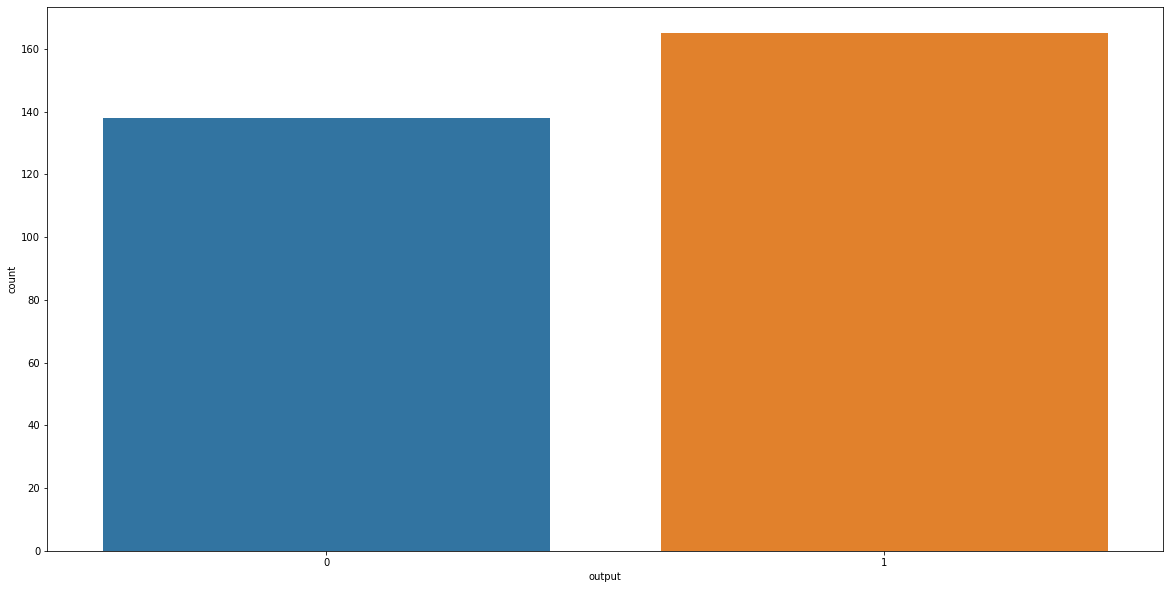

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.countplot(x="output", data=heart_data)

In [18]:
heart_data.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

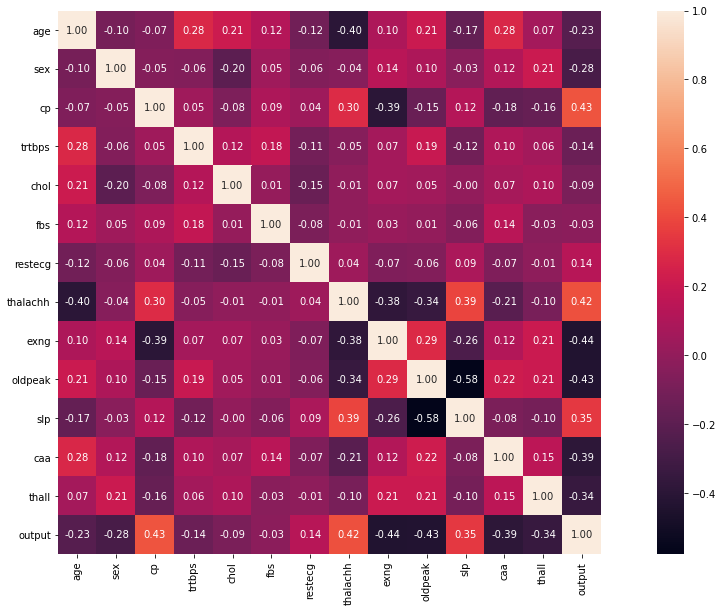

In [20]:
cols = heart_data.columns
cm = np.corrcoef(heart_data.values.T)
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
cm_2 = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={"size": 10}, yticklabels=cols.values, 
                                                                                              xticklabels=cols.values)

In [21]:
heart_data["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

Text(0.5, 1.0, 'Chest Pain v. Heart Attack')

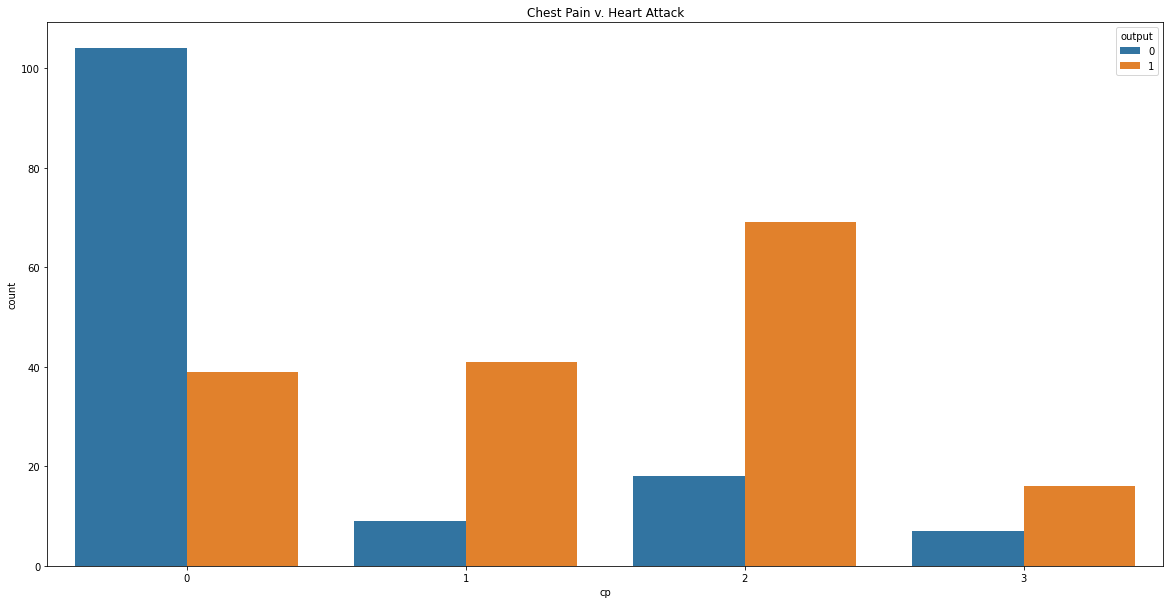

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.countplot(x="cp", data=heart_data, hue="output")
plt.title("Chest Pain v. Heart Attack")

Text(0.5, 1.0, 'Age v. Heart Rate')

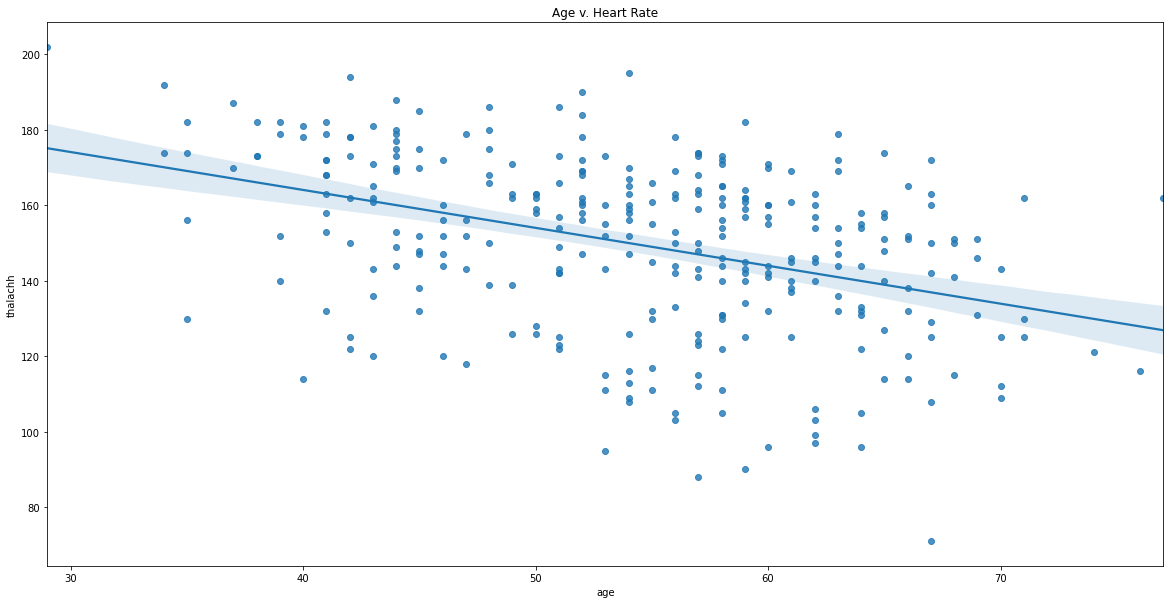

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.regplot(x="age", y="thalachh", data=heart_data)
plt.title("Age v. Heart Rate")

Text(0.5, 1.0, 'Age v. Heart Rate')

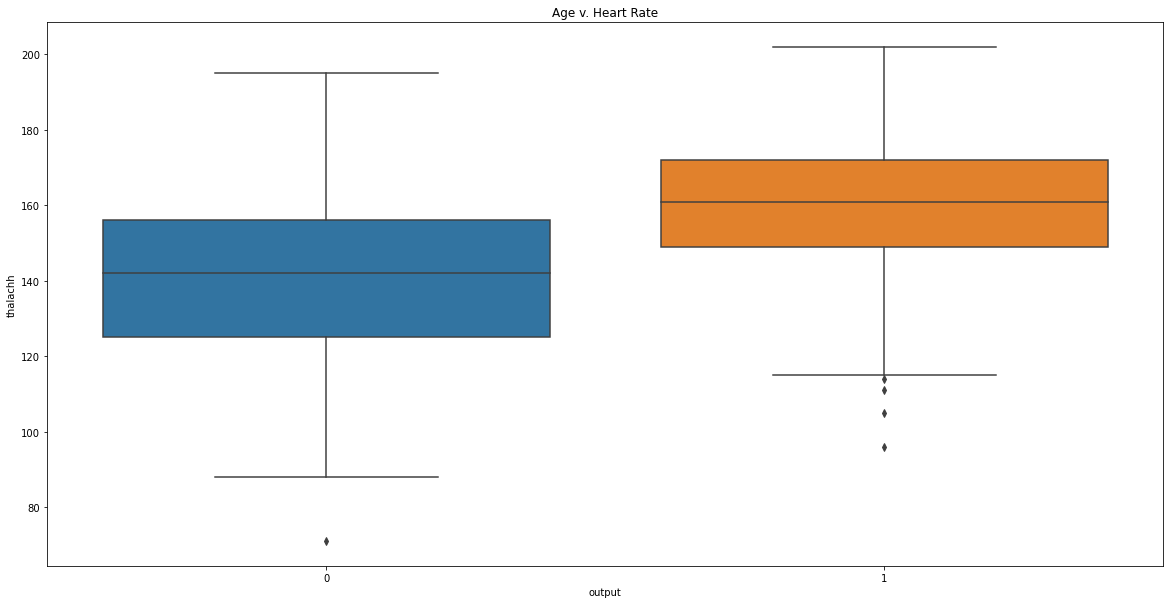

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.boxplot(x="output", y="thalachh", data=heart_data)
plt.title("Heart Rate v. Heart Attacks")

Text(0.5, 1.0, 'Heart Rate v. Heart Attacks')

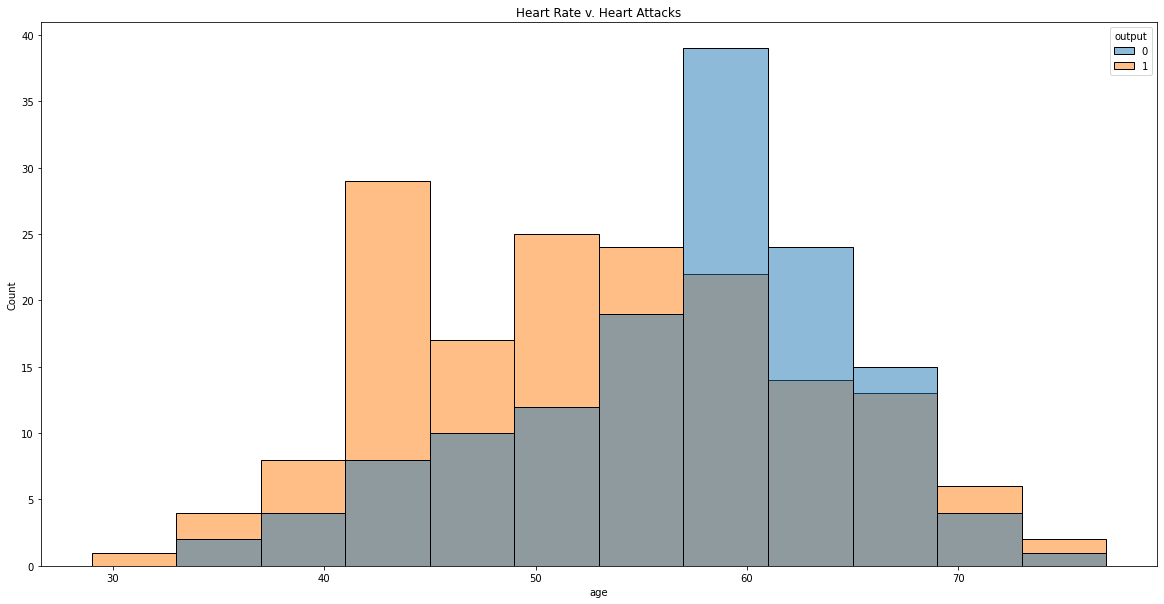

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.histplot(x="age", data=heart_data, hue="output")
plt.title("Heart Rate v. Heart Attacks")

In [88]:
X = heart_data.drop(["output"], axis=1)
y = heart_data["output"]

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1, stratify=y)
X_train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
70,54,1,2,120,258,0,0,147,0,0.4,1,0,3
42,45,1,0,104,208,0,0,148,1,3.0,1,0,2
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3


In [35]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=1)
random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=1)

In [38]:
x, y = (list(x) for x in zip(*sorted(zip(random_forest.feature_importances_, X_train.columns), reverse = True)))

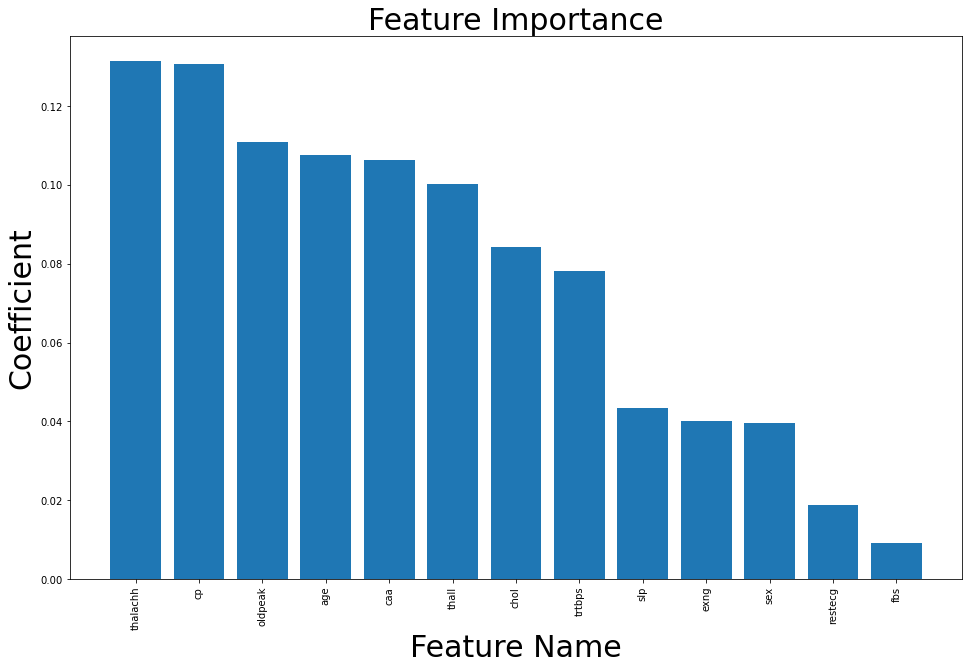

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
plt.bar(y, x)
plt.title("Feature Importance", size=30)
plt.xlabel("Feature Name", size=30)
plt.ylabel("Coefficient", size=30)
plt.xticks(size=10, rotation=90)
plt.yticks(size=10)
plt.show()

In [84]:
important_features = []
for name, importance in zip(X_train.columns, random_forest.feature_importances_):
    if importance > 0.06:
        important_features.append(name)

In [77]:
X_train = X_train.loc[:, important_features]
X_test = X_test.loc[:, important_features]

In [78]:
# Scale your data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [52]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
svm = SVC()
xgb = XGBClassifier()

In [54]:
all_models = [rf, dt, svm, xgb]
for clf in all_models:
    print("model: " + str(clf))
    clf.fit(X_train_scaled, y_train)
    predictions = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    print("accuracy: " + str(accuracy))
    print("__________")

model: RandomForestClassifier()
accuracy: 0.7894736842105263
__________
model: DecisionTreeClassifier()
accuracy: 0.7105263157894737
__________
model: SVC()
accuracy: 0.75
__________
model: XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)
[17:30:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objec

C:\Users\Christopher\anaconda2\envs\PythonAdv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [60]:
majority_predictions = np.ones(len(X_test))

In [61]:
baseline = accuracy_score(y_test, majority_predictions)
baseline

0.5394736842105263

In [62]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

In [80]:
params = {"bootstrap": [True, False], 
          "max_depth": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
          "max_features": ["auto", "sqrt"], 
          "min_samples_leaf": [1, 2, 3, 4],
          "min_samples_split": [2, 5, 10],
          "n_estimators": [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
         }
rf = RandomForestClassifier(random_state=0)
folds = 5
param_combo = 5
inner_cv = StratifiedKFold(n_splits = folds, shuffle=True, random_state=True)
outer_cv = StratifiedKFold(n_splits = folds, shuffle=True, random_state=True)
random_search = RandomizedSearchCV(rf, param_distributions=params, n_iter=param_combo, n_jobs=4, 
                                   cv=inner_cv.split(X_train_scaled, y_train), random_state=12, verbose=3)
random_search.fit(X_train_scaled, y_train)
print("best_estimator")
print(random_search.best_estimator_)
print("best_hyper_parameters")
print(random_search.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
best_estimator
RandomForestClassifier(max_depth=60, max_features='sqrt', min_samples_leaf=4,
                       n_estimators=1000, random_state=0)
best_hyper_parameters
{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': True}


In [66]:
best_rf = RandomForestClassifier(bootstrap=False, max_depth=60, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=1000, random_state=0)
best_rf.fit(X_train_scaled, y_train)
predictions = best_rf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print("accuracy: " + str(accuracy))
print("__________")

accuracy: 0.8289473684210527
__________


In [67]:
params_xg = {
            "min_child_weight": [1, 5, 10],
            "gamma": [0.5, 1, 1.5, 2, 2.5],
            "subsample": [0.6, 0.8, 1],
            "colsample_bytree": [0.6, 0.8, 1],
            "max_depth": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
         }
xg = XGBClassifier(random_state=0)
folds = 5
param_combo = 5
inner_cv = StratifiedKFold(n_splits = folds, shuffle=True, random_state=True)
outer_cv = StratifiedKFold(n_splits = folds, shuffle=True, random_state=True)
random_search = RandomizedSearchCV(xg, param_distributions=params, n_iter=param_combo, n_jobs=4, 
                                   cv=inner_cv.split(X_train_scaled, y_train), random_state=12, verbose=3)
random_search.fit(X_train_scaled, y_train)
print("best_estimator")
print(random_search.best_estimator_)
print("best_hyper_parameters")
print(random_search.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Christopher\anaconda2\envs\PythonAdv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:00:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:00:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best_estimator
XGBClassifier(base_score=0.5, booster='gbtree', bootstrap=False,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_const

In [69]:
best_xg = XGBClassifier(base_score=0.5, booster='gbtree', bootstrap=False,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=40, max_features='sqrt',
              min_child_weight=1, min_samples_leaf=3, min_samples_split=10,
              monotone_constraints='()', n_estimators=1200,
              n_jobs=4, num_parallel_tree=1, random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

best_xg.fit(X_train_scaled, y_train)
predictions = best_xg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print("accuracy: " + str(accuracy))
print("__________")

[18:02:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:02:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy: 0.7105263157894737
__________


In [91]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(bootstrap=False, max_depth=60, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=1000, random_state=0)
scores = cross_val_score(rf, X_scaled, y, cv=5)
print(np.mean(scores))
print(scores)

0.8282513661202187
[0.80327869 0.90163934 0.81967213 0.83333333 0.78333333]


In [92]:
import joblib
filename = 'random_forest_model.sav'
joblib.dump(rf, filename)

['random_forest_model.sav']